In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [2]:
class LabelDataset(tf.data.Dataset):
    def __init__(self, path, batch_size):
        self.video_paths = [os.path.join(path, dir_path) for dir_path in os.listdir(path)]
        self.num_samples = 0

        # Load the mask shape from the first video path
        mask_sample_path = os.path.join(self.video_paths[0], 'mask.npy')
        mask_shapes = np.load(mask_sample_path).shape

        # Calculate the total number of samples
        self.num_samples = mask_shapes[0] * len(self.video_paths)
        self.batch_size = batch_size

    def _inputs(self):
        return []

    def element_spec(self):
        image_shape = tf.TensorShape([None, None, 3])
        mask_shape = tf.TensorShape([None])
        return (image_shape, mask_shape)

    def _generator(self):
        images_batch = []
        masks_batch = []
        for path in self.video_paths:
            mask_path = os.path.join(path, 'mask.npy')
            masks = np.load(mask_path)

            for i in range(masks.shape[0]):
                image_path = os.path.join(path, f'image_{i}.png')
                image_data = tf.io.read_file(image_path)

                image = tf.image.decode_png(image_data, channels=3)
                mask = tf.convert_to_tensor(masks[i])

                images_batch.append(image)
                masks_batch.append(mask)

                if ((len(images_batch) >= self.batch_size) & (len(masks_batch) >= self.batch_size)):
                    output_images_batch = images_batch[:]
                    output_masks_batch = masks_batch[:]

                    images_batch = []
                    masks_batch = []

                    yield {'image': tf.stack(output_images_batch), 'target': tf.stack(output_masks_batch)}

    def __len__(self):
        return self.num_samples

    def __iter__(self):
        return self._generator()

In [3]:
path = '/content/videos'
custom_dataset = LabelDataset(path, 2)

In [4]:
for a in custom_dataset:
    print("Image shape:", a['image'].shape)
    print("Mask shape:", a['target'].shape)

Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 160, 240)
Image shape: (2, 160, 240, 3)
Mask shape: (2, 16

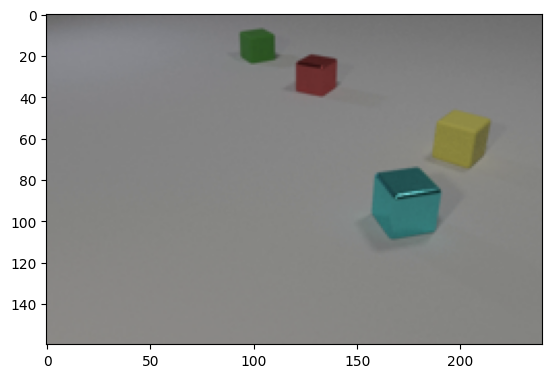

In [5]:
plt.imshow(a['image'][0])

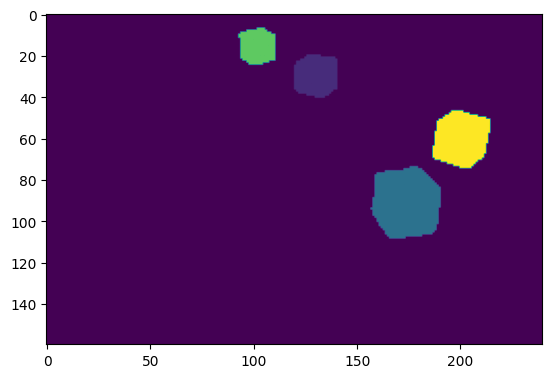

In [6]:
plt.imshow(a['target'][0])

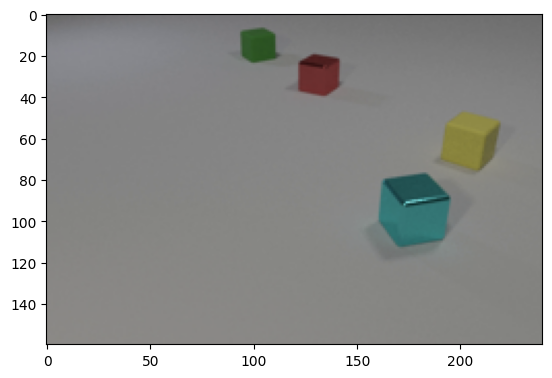

In [7]:
plt.imshow(a['image'][1])

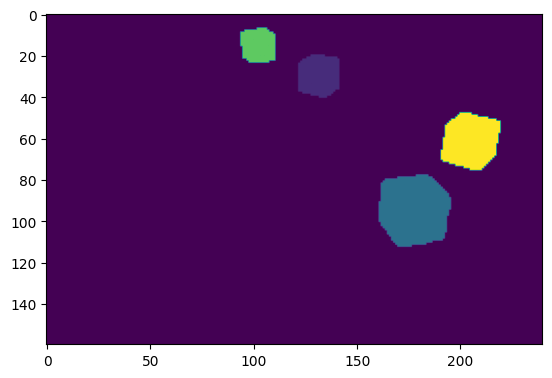

In [8]:
plt.imshow(a['target'][1])

In [9]:
a['image'].shape

TensorShape([2, 160, 240, 3])

In [10]:
a['target'].shape

TensorShape([2, 160, 240])